## **Information Visualization - Project 1**

**Group 24** - Date: 2022/9/13

### **Team Members**

|  Name  |  Email  |  Student ID  |
|  :----:  |  :----:  |  :----:  |
|  Wenbo Liu  |  wbliu20@lzu.edu.cn  |  320200931121  |
|  Chengkai Lin  |  linchk20@lzu.edu.cn  |  320200945841  |
|  Yifei Guo  |  guoyf20@lzu.edu.cn  |  320200930901  |
|  Xuda Han  |  hanxd20@lzu.edu.cn  |  320200945781  |

---

### **Prerequisites**

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
sns.set(style = 'ticks', font_scale = 0.6)

### **Requirement 1**
<small>
<strong>Participated Members:</strong>
<ul>
<li>Wenbo Liu: <i>Helping other members with coding issues</i></li>
<li>Chengkai Lin: <i>Doing 1.3</i></li>
<li>Yifei Guo: <i>Doing 1.4</i></li>
<li>Xuda Han: <i>Doing 1.1 and 1.2, inspecting data</i></li>
</ul>
</small>
  
>Perform an exploratory analysis of the dataset. Remember that exploratory analyses do not need to be refined or clear. It is just a draft of several visualizations that help get familiar with the data.  
>  
>Hence, in this step you should have several visualizations that help getting an idea of the datasets and will serve as a starting point to the explanatory visualizations in this project. (Don’t forget the difference between exploratory and explanatory).  
>  
>Hint: Python notebooks are usually useful for exploratory analyses because you can combine python code, visualizations and markdown text. Use all of these elements.

#### **1.1 Data Structure**
We first read the specific columns (*algorithm*, *no_datapoints*, *no_features*, *train_energy(J)*) in the dataset to check the data structure.

In [75]:
df = pd.read_csv('results-2021-12-18.csv', usecols=['algorithm', 'no_datapoints', 'no_features', 'train_energy(J)'])
df

,algorithm,no_datapoints,no_features,train_energy(J)
0,AdaBoost,2730,8169,1.037993
1,Decision Tree,3900,2451,0.068482
2,SVM,3900,4084,0.530155
3,AdaBoost,3900,1633,0.243067
4,Bagging Classifier,3900,6535,0.699298
...,...,...,...,...
3595,Random Forest,3900,4901,1.501089
3596,Bagging Classifier,1559,8169,0.170978
3597,SVM,3900,5718,1.108957
3598,Random Forest,1559,8169,0.581876


It was hard to get any useful information from the table above, so we categorized it by algorithm and the following are our discoveries:
+ All algorithms have the same group of values for *no_datapoints* and *no_features*.
+ *train_energy(J)* in different entries differs when *no_datapoints* or *no_features*  have the same value.

In [76]:
algorithm = df.groupby('algorithm')
for name, rows in algorithm:
    print(rows)

     algorithm  no_datapoints  no_features  train_energy(J)
0     AdaBoost           2730         8169         1.037993
3     AdaBoost           3900         1633         0.243067
7     AdaBoost           3119         8169         0.581184
8     AdaBoost           3900         3268         0.407974
25    AdaBoost           1169         8169         0.250212
...        ...            ...          ...              ...
3556  AdaBoost           3900          817         0.292578
3558  AdaBoost           2340         8169         0.427181
3560  AdaBoost           3900          817         0.266558
3588  AdaBoost           1169         8169         0.155544
3599  AdaBoost           3900         8169         0.992407

[600 rows x 4 columns]
               algorithm  no_datapoints  no_features  train_energy(J)
4     Bagging Classifier           3900         6535         0.699298
9     Bagging Classifier            779         8169         0.092099
23    Bagging Classifier           3900       

#### **1.2 Pair Plot**
According to the pair plot, there is no apparent relationship between *no_datapoints* and *no_features*, but they each are related to *train_energy(J)*.

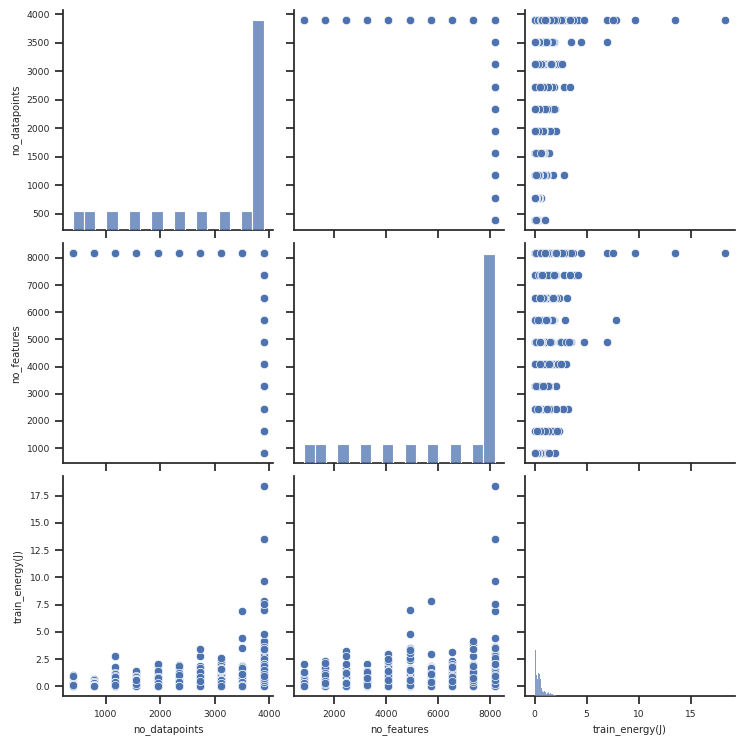

In [77]:
sns.pairplot(df)

#### **1.3 Bifactor Analysis**
We drew a graph representing how *no_datapoints* and *no_features* affect *train_energy(J)*. In order to find relationship more conveniently, we categorized the data by *algorithm*, *no_datapoints* and *no_features*, and calculated the average value of *train_energy(J)*.  
  
It seems from the graph that *train_energy(J)* increases as *no_datapoints* gets larger, but there is no clear linear relationship between *no_features* and *train_energy(J)*

In [78]:
def bifactor(dataframe: pd.DataFrame, columns):
    grouped = dataframe.groupby(columns[-2: : -1])  # Aggregate 'algorithm', 'no_datapoints' and 'no_features'
    mean = grouped.mean()  # Calculate the average value of 'train_energy(J)'
    mean.reset_index(inplace = True)  # Reset the index
    data = mean.groupby(columns[0])  # Aggregate 'algorithm'
    fig, counter = plt.figure(figsize = (9, 6)), 1  # Generate plot
    for key, value in data:
        axes = fig.add_subplot(2, 3, counter)  # Add subplot
        axes.set_title(key)  # Set the title
        sns.scatterplot(data = value, x = columns[1], y = columns[2], hue = columns[3], ax = axes)  # Draw the scatter plot
        if counter != 1:
            axes.set_ylabel('')
        else:
            axes.set_ylabel('no_features', rotation = 'horizontal', labelpad = 45, loc = 'bottom')
        if counter != 4:
            axes.set_xlabel('')
        sns.despine(top = True, right = True)  # Removes upper and right frame
        counter += 1
    plt.tight_layout()
    plt.show()

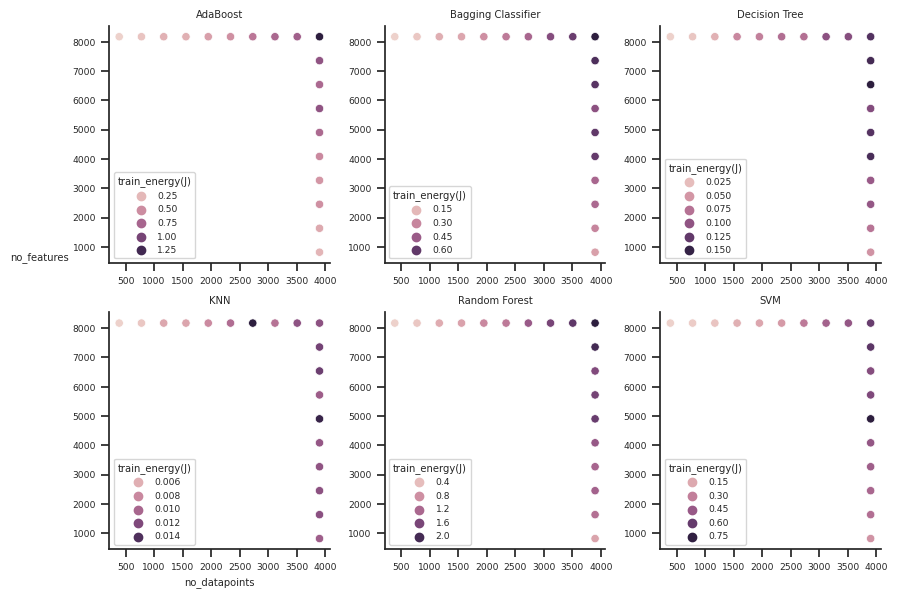

In [79]:
bifactor(df,['algorithm','no_datapoints','no_features','train_energy(J)'])

#### 1.4 **Single-Factor Analysis**
From the analyses and conclusions above, we chose an algorithm that appears to be of most relevance, **Random Forest**, to take deeper insights into the relationships between these variables.  
  
We fitted a regression curve of **Random Forest** using its scatter plot and found that *train_energy(J)* has a significant increase as *no_datapoints* gets larger, while the relationship between *no_features* and *train_energy* is unrecognizable since the line is almost flat.

In [80]:
def sgfactor(dataframe: pd.DataFrame, columns, alg):
    target = dataframe[dataframe[columns[0]] == alg]
    column1 = target.loc[: , [columns[1], columns[3]]]
    column2 = target.loc[:, [columns[2], columns[3]]]
    fig,counter = plt.figure(figsize = (6, 3)), 1
    for item in [[column1, columns[1], columns[3]], [column2, columns[2], columns[3]]]:
        axes = fig.add_subplot(1, 2, counter)
        sns.regplot(data = item[0],x = item[1],y = item[2]) 
        if counter == 1:
            axes.set_ylabel('train_energy(J)', rotation = 'horizontal', labelpad = 25)
        else:
            axes.set_ylabel('')
        sns.despine(top = True, right = True)
        counter += 1
    fig.suptitle(alg)
    plt.tight_layout()
    plt.show()

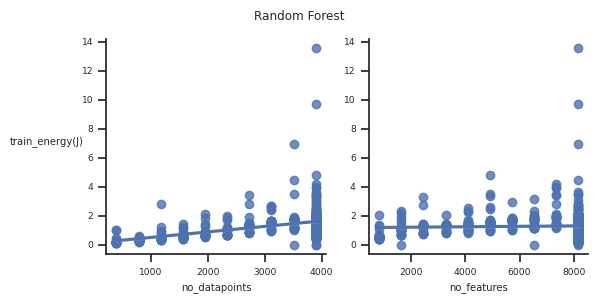

In [81]:
sgfactor(df, ['algorithm', 'no_datapoints', 'no_features', 'train_energy(J)'], 'Random Forest')

In conclusion, we suggested that there is some kind of **quadratic relationship** between *no_features* and *train_energy(J)*, and we will take more research into it in Requirement 2.

### **Requirement 2**
<small>
<strong>Participated Members:</strong>
<ul>
<li>Wenbo Liu: <i>Helping with mathematic problems</i></li>
<li>Chengkai Lin: <i>Writing the doc and modularizing</i></li>
<li>Yifei Guo: <i>Coding and optimizing</i></li>
</ul>
</small>
  
>Create a visualization that shows, for the algorithm SVM, how no_features affects energy consumption (train_energy(J)). This visualization should 
><ol>
><li> Choose the most suitable chart type,</li>
><li> Follow the visualization guidelines taught in the class,</li>
><li> Be as simple as possible. If necessary, there should be a visual element highlighting how no_features correlates with train_energy(J).</li>
></ol>  
>
>Note that each experiment is repeated 30 times (as denoted by the feature iteration). You may want to use the average of these 30-sized samples and maybe its standard deviation.

In [82]:
def feature_energy(dataframe: pd.DataFrame, extCol: list, indCol, depCol):
    """
    This function takes a dataframe, a list of columns that need extraction, a column of independent variables and a column of dependent variables as parameters.
    It then draws a regression curve and a scatter plot of the given data using Seaborn and Matplotlib.
    """
    target = dataframe[dataframe[extCol[0]] == extCol[1]]
    rel = sns.relplot(data = target, x = indCol, y = depCol, kind = 'line', errorbar = 'sd')
    rel.fig.suptitle(extCol[1])
    sns.scatterplot(data = target, x = indCol, y = depCol, color = 'lightgray')
    sns.despine(top = True, right = True)
    plt.ylabel(depCol, rotation = "horizontal", labelpad = 25)
    plt.ylim(0, 2.3) # 
    plt.show()

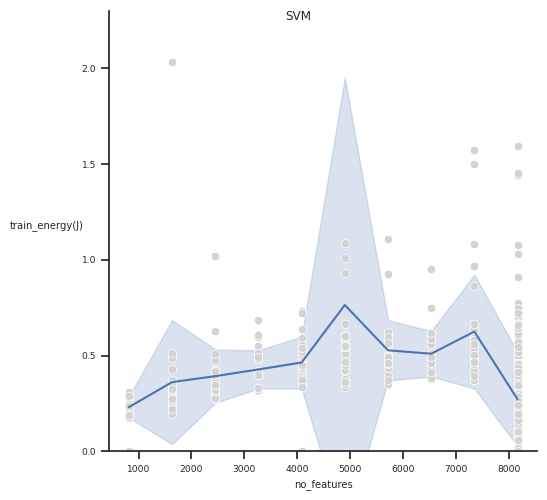

In [83]:
feature_energy(df, ['algorithm', 'SVM'], 'no_features', 'train_energy(J)')

The average value line shows that as *no_features* gets larger, *train_energy(J)* first increases and then decreases, which proved our suggestions that there sure is some quadratic relationship between them.

### **Requirement 3**
<small>
<strong>Participated Members:</strong>
<ul>
<li>Wenbo Liu: <i>Setting up the frame of the code</i></li>
<li>Chengkai Lin: <i>Providing suggestions on the plot</i></li>
<li>Xuda Han: <i>Optimizing and modularizing</i></li>
</ul>
</small>
  
>As you can imagine, creating a simple visualization to show all results is far from trivial. There are 3 main variables that are compared against train_energy(J): no_datapoints, no_features, and algorithm. Create a visualization using small multiples that shows, for each machine learning algorithm, how no_datapoints and no_features affect energy consumption (train_energy(J)).

We drew a scatter plot and fitted a regression curve for each pair of the data. In order to represent the relationships intuitively, we applied quadratic polynomials to fit the curves.

In [84]:
def small_multiples(dataframe: pd.DataFrame, groupedby, indVars: list, depVar):
    """
    This function takes a dataframe, a column for aggregation, a list of columns of independent variables and a column of dependent variables as parameters.
    It also has a subfunction for drawing subplots.
    """
    def plot(data, name, cols):
        axes = fig.add_subplot(height, width, num)
        sns.regplot(x = cols[0], y = cols[1], data = value[cols], order = 2,
            scatter_kws = {'color': 'darkturquoise', 'alpha': 0.3}, line_kws = {'color': 'navy'})
        sns.despine(top = True, right = True)
        axes.set_xlabel('')
        if num <= width: # Is it the first row?
            axes.set_title(name)
        if num % width == 1: # Is it the first column?
            axes.set_ylabel(cols[1], rotation = 'horizontal', labelpad = 55, weight = 'bold', size = 10)
            axes.set_xlabel(cols[0])
        else:
            axes.set_ylabel('')
            
    grouped = dataframe.groupby(groupedby)
    width = len(grouped)
    height = len(indVars)
    fig, num = plt.figure(figsize = (18, 6)), 0

    for i in indVars:
        for key, value in grouped:
            num += 1
            plot(value, key, [i, depVar])

    plt.tight_layout()
    plt.show()

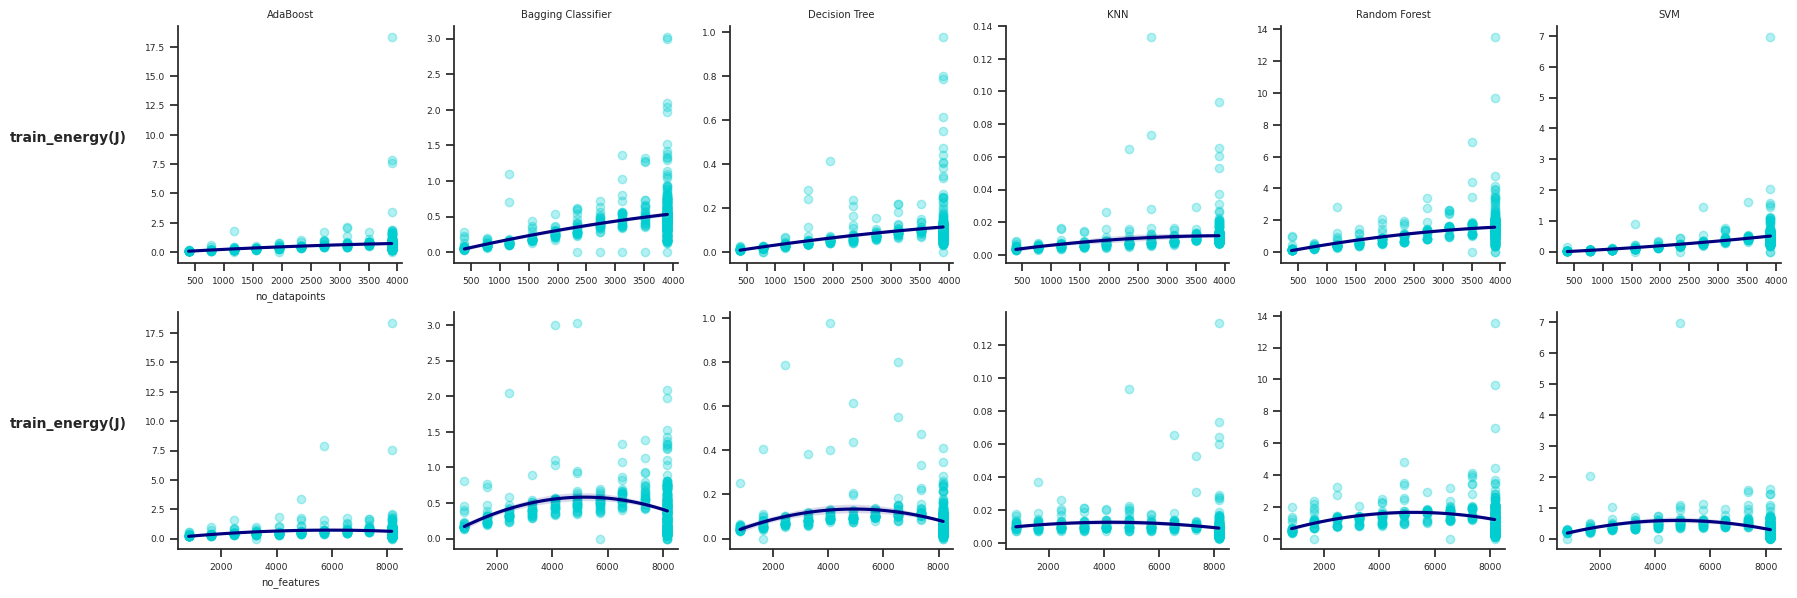

In [85]:
small_multiples(df, 'algorithm', ['no_datapoints', 'no_features'], 'train_energy(J)')

It can be clearly seen from the plot that *train_energy(J)* increases as *no_datapoints* increases, and first increases as *no_features* increases and later decreases.

### **Requirement 4**
<small>
<strong>Participated Members:</strong>
<ul>
<li>Wenbo Liu: <i>Discussing, providing ideas</i></li>
<li>Xuda Han: <i>Writing the code</i></li>
</ul>
</small>
  
>Create a single plot that is able to capture most of the insights of the visualization in requirement 3. You wont be able to capture all the insights, but the idea is the capture as much as possible while keeping the visualization simple and interesting.

We decided to visualize the conclusion we derived in Requirement 3, using two linear graphs in one plot, one for *no_datapoint* and *train_energy(J)*, one for *no_features* and *train_energy(J)*. The final result is presented below.

In [86]:
def insight(df, groupedby, indVars: list, depVar):
    """
    This function takes a dataframe, a column for aggregation, a list of columns of independent variables and a column of dependent variables as parameters.
    It first normalizes the dataset per algorithm and concatenates all the results.
    Then draws linear graphs on the plot.
    """
    results = []
    for key, value in df.groupby(groupedby):
        value = value[indVars + [depVar]]
        value = (value - value.min()) / (value.max() - value.min())
        results.append(value)
    norm = pd.concat(results)

    fig, ax = plt.subplots()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks((), ())
    ax.set_yticks((), ())
    ax.set_xlabel("\n".join(indVars))
    ax.set_ylabel(depVar, rotation = "horizontal", labelpad = 25)

    for i in indVars:
        plt.plot(norm[[i, depVar]].groupby(i).agg("mean"), lw = 4, label = i)
    plt.legend()

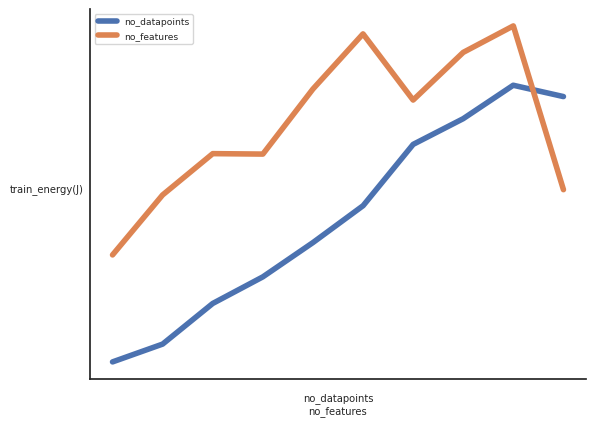

In [87]:
insight(df, "algorithm", ["no_datapoints", "no_features"], "train_energy(J)")

The plot matches the conclusion we derived in previous requirement.

### **Requirement 5**
<small>
<strong>Participated Members:</strong>
<ul>
<li>Chengkai Lin: <i>Writing the code</i></li>
<li>Yifei Guo: <i>Optimizing the code and the color</i></li>
</ul>
</small>
  
>Create a visualization that shows an interesting insight in the data that was not unveiled by the visualizations of requirements 2, 3, and 4.

After discussion, we decided to calculate the sum of *train_energy(J)* for each algorithm, and represent them using a tree map with different colors and sizes. It would show us which algorithm consumes the most energy and which consumes the least.

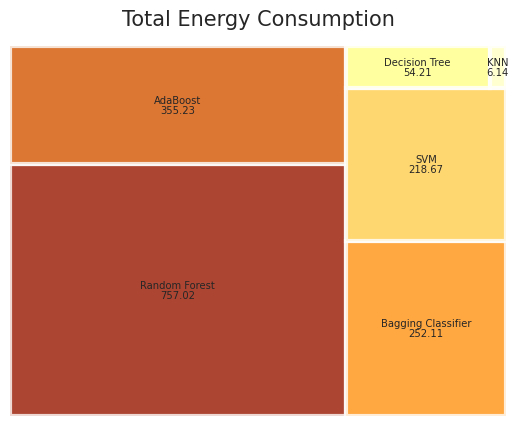

In [88]:
energy = df.groupby("algorithm")["train_energy(J)"].sum().sort_values(ascending = False)
plot = squarify.plot(sizes = energy, label =  energy.index, alpha = 0.8,
    color = [plt.cm.afmhot(.3 + .7 * i / float(len(energy))) for i in range(len(energy))],
    value = energy.apply(lambda x: round(x, 2)), edgecolor = "white", linewidth =3)
plot.set_title("Total Energy Consumption", fontdict = {"fontsize": 15}, pad = 15)
plt.rc("font", size = 10)
plt.axis("off")
plt.show()

It can be seen that **Random Forest** consumes the most energy, and **KNN** consumes the least.

### **Conclusion**

The project started out a little bit messy. We had some trouble assigning tasks to the members, and the communication was also chaotic, forcing us to pause developing or even roll back some parts of the code. Hopefully we could do better next time.